# Tratamiento de valores nulos
Autor: José Roa
Rama: roajg/preprocessing-nulls
Fecha: 2025-04-04

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
#Cargar el archvivo csv
data = pd.read_csv("../../input/petfinder-adoption-prediction/train/train.csv", sep=",")
#Visualizacion primeras filas
data.head()


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [29]:
#Visualizacion de la cantidad de filas y columnas
data.shape


(14993, 24)

In [30]:
#Visualizacion de las ultimas filas
data.tail()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4
14992,1,Fili,1,307,307,1,2,0,0,2,...,1,1,0,41332,9ed1d5493d223eaa5024c1a031dbc9c2,0,Fili just loves laying around and also loves b...,a83d95ead,1.0,3


In [37]:
# Tabla Resumen tipos, nulos, unicos y porcentaje de nulos
info_data = pd.DataFrame({
    'Tipo de dato': data.dtypes,
    'Valores nulos': data.isnull().sum(),
    'Porcentaje de nulos': (data.isnull().sum() / len(data) * 100).round(2),
    'Valores Unicos': data.nunique()
})

info_data = info_data.sort_values(by='Valores nulos', ascending=False)
info_data

,Tipo de dato,Valores nulos,Porcentaje de nulos,Valores Unicos
Name,object,1265,8.44,9059
Description,object,13,0.09,14031
Type,int64,0,0.00,2
PhotoAmt,float64,0,0.00,31
PetID,object,0,0.00,14993
VideoAmt,int64,0,0.00,9
RescuerID,object,0,0.00,5595
State,int64,0,0.00,14
Fee,int64,0,0.00,74
Quantity,int64,0,0.00,19


In [33]:
# Estadistica de columnas numericas
data.describe().round(2)


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00
mean,1.46,10.45,265.27,74.01,1.78,2.23,3.22,1.88,1.86,1.47,1.73,1.56,1.91,1.04,1.58,21.26,41346.03,0.06,3.89,2.52
std,0.50,18.16,60.06,123.01,0.68,1.75,2.74,2.98,0.55,0.60,0.67,0.70,0.57,0.20,1.47,78.41,32.44,0.35,3.49,1.18
min,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,41324.00,0.00,0.00,0.00
25%,1.00,2.00,265.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,2.00,2.00
50%,1.00,3.00,266.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,3.00,2.00
75%,2.00,12.00,307.00,179.00,2.00,3.00,6.00,5.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,0.00,41401.00,0.00,5.00,4.00
max,2.00,255.00,307.00,307.00,3.00,7.00,7.00,7.00,4.00,3.00,3.00,3.00,3.00,3.00,20.00,3000.00,41415.00,8.00,30.00,4.00


In [26]:
# Estadistica de columnas categoricas
data.describe(include='object')

,Name,RescuerID,Description,PetID
count,13728,14993,14980,14993
unique,9059,5595,14031,14993
top,Baby,fa90fa5b1ee11c86938398b60abc32cb,For Adoption,86e1089a3
freq,66,459,164,1


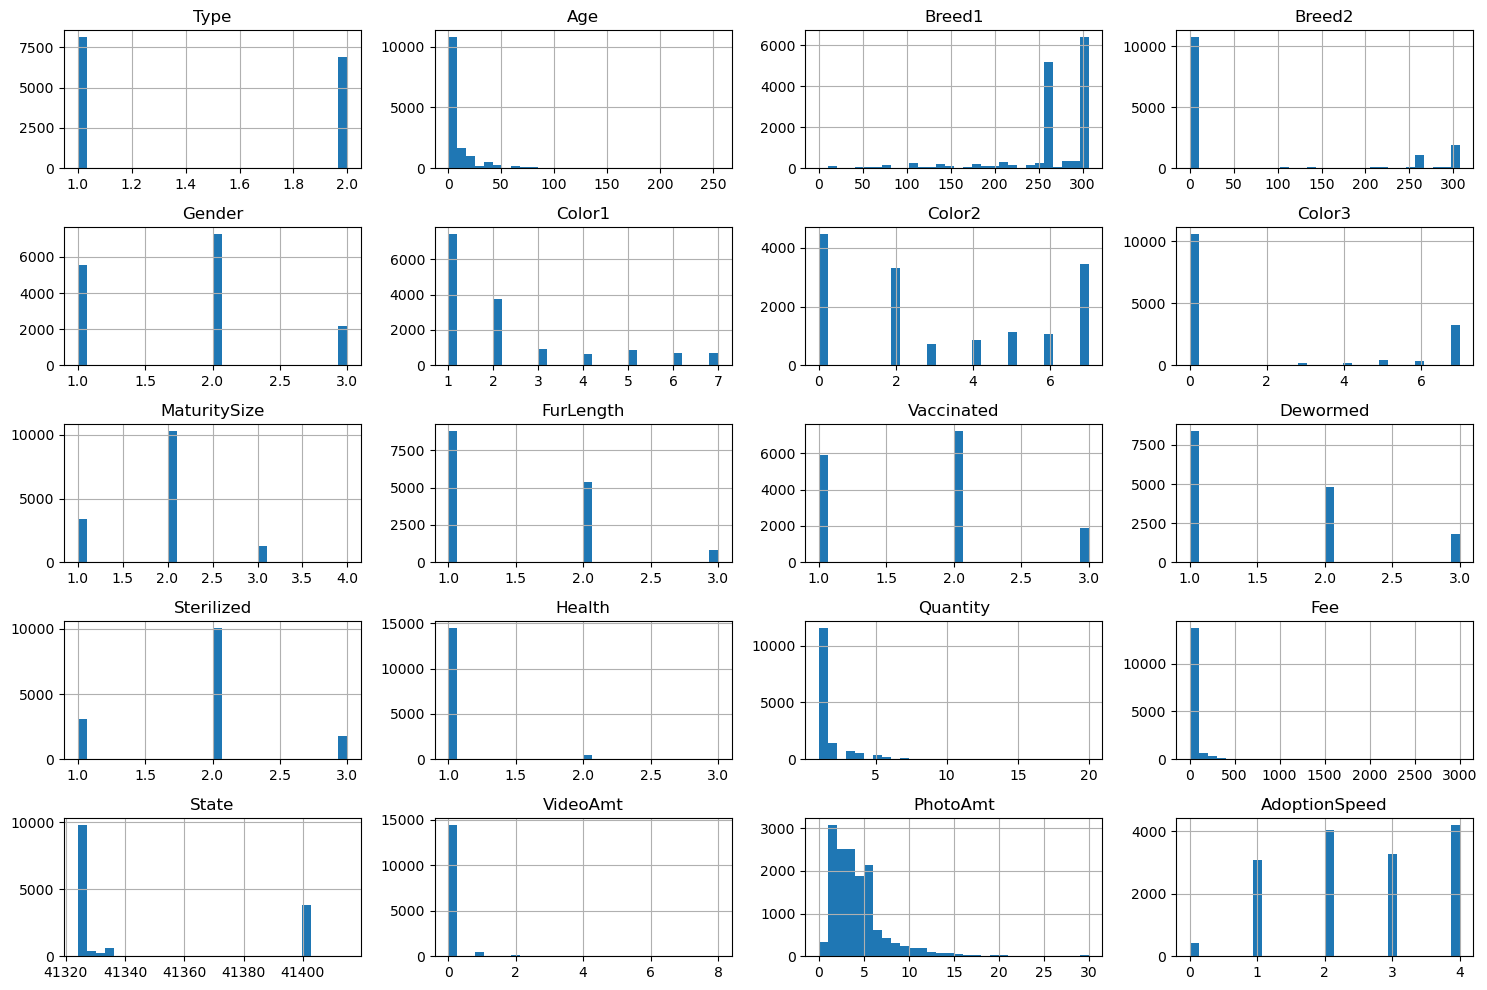

In [39]:
# Histograma de todas las variables numéricas
data.select_dtypes(include='number').hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

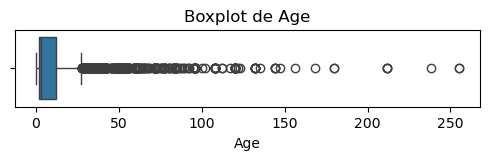

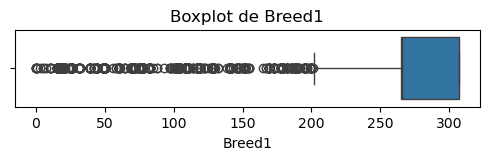

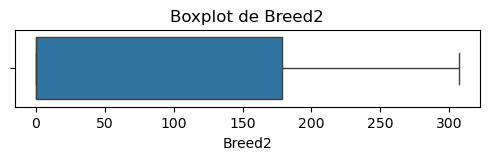

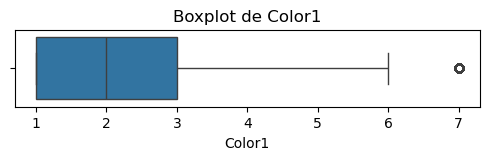

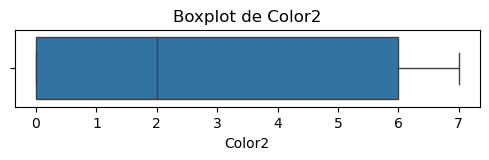

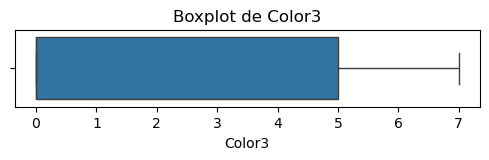

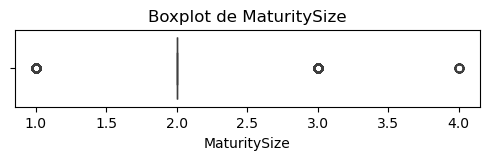

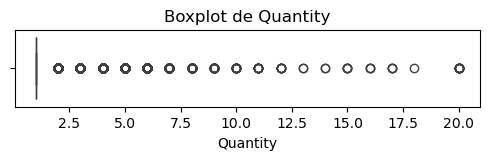

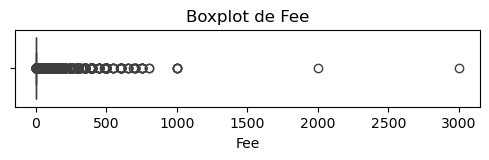

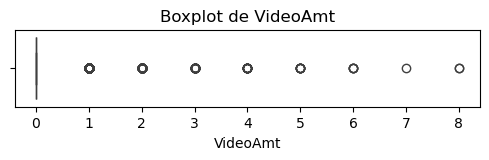

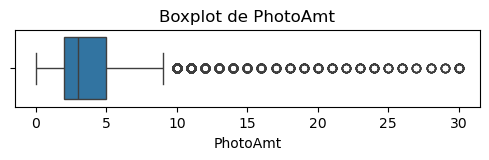

In [61]:
# Lista de columnas específicas
columns_to_plot = ['Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 
                   'MaturitySize', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

# Boxplot para cada columna especificada
for col in columns_to_plot:
    plt.figure(figsize=(6, 1))  # Tamaño de la figura
    sns.boxplot(x=data[col])  # Boxplot de la columna
    plt.title(f'Boxplot de {col}')  # Título con el nombre de la columna
    plt.show()  # Mostrar el boxplot

In [60]:
# Mapear 1 y 2 a 'Perro' y 'Gato'
#data['tipo_animal'] = data['Type'].map({1: 'Perro', 2: 'Gato'})

# Agrupar, contar y calcular porcentaje
freq_percent = (
    data.groupby('Type')['Name']
    .value_counts(dropna=False)
    .rename('Frecuencia')
    .reset_index()
)

# Calcular porcentaje dentro de cada tipo
freq_percent['Porcentaje (%)'] = (
    freq_percent['Frecuencia'] /
    freq_percent.groupby('Type')['Frecuencia'].transform('sum') * 100
).round(2)

# Ordenar por tipo de animal y frecuencia descendente
freq_percent = freq_percent.sort_values(['Frecuencia', 'Type'], ascending=[False, True])

freq_percent




,Type,Name,Frecuencia,Porcentaje (%)
0,1,NaN,653,8.03
5042,2,NaN,612,8.92
1,1,Lucky,48,0.59
2,1,Puppy,45,0.55
3,1,Brownie,44,0.54
...,...,...,...,...
9725,2,é»é» Hei Hei,1,0.01
9726,2,ð¸ð·ð Take Me PLEASE ð,1,0.01
9727,2,ðððð,1,0.01
9728,2,ððSolid Black Kittenðð,1,0.01


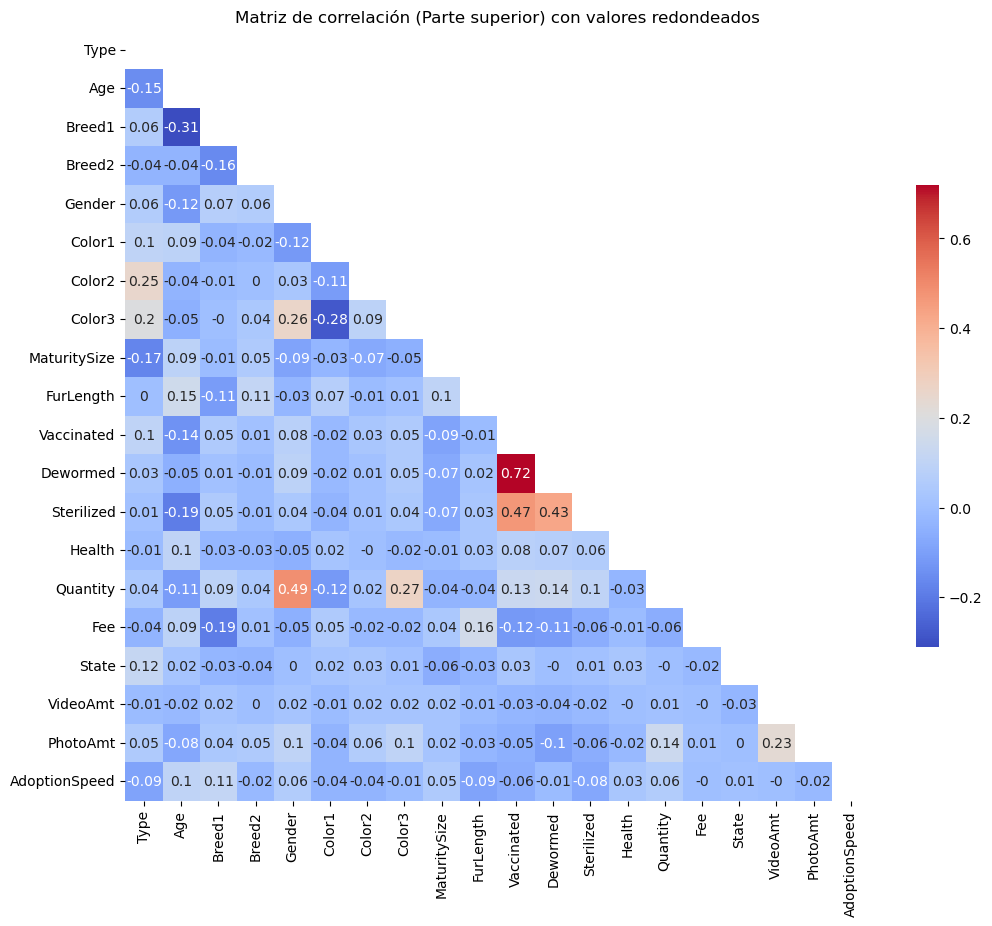

In [66]:
# Matriz de correlación
corr_matrix = data.corr(numeric_only=True)

# Redondear los valores a 2 decimales
corr_matrix = corr_matrix.round(2)

# Crear máscara para mostrar solo la parte superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar la matriz de correlación con valores redondeados y mostrar la diagonal
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, cbar_kws={'shrink': 0.6})
plt.title("Matriz de correlación (Parte superior) con valores redondeados")
plt.show()